In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Make sure your file name matches exactly
df = pd.read_csv('flights.csv')

# Look at the first 5 rows to see what columns we have
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'flights.csv'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Make sure your file name matches exactly
df = pd.read_csv('flights.csv')

# Look at the first 5 rows to see what columns we have
print(df.head())

   year  month  day_of_month  day_of_week   fl_date origin origin_city_name  \
0  2024      1             1            1  1/1/2024    JFK     New York, NY   
1  2024      1             1            1  1/1/2024    MSP  Minneapolis, MN   
2  2024      1             1            1  1/1/2024    JFK     New York, NY   
3  2024      1             1            1  1/1/2024    RIC     Richmond, VA   
4  2024      1             1            1  1/1/2024    DTW      Detroit, MI   

  origin_state_nm  dep_time  taxi_out  wheels_off  wheels_on  taxi_in  \
0        New York    1247.0      31.0      1318.0     1442.0      7.0   
1       Minnesota    1001.0      20.0      1021.0     1249.0      6.0   
2        New York    1411.0      21.0      1432.0     1533.0      8.0   
3        Virginia    1643.0      13.0      1656.0     1747.0     12.0   
4        Michigan    1010.0      21.0      1031.0     1016.0      4.0   

   cancelled  air_time  distance  weather_delay  late_aircraft_delay  
0        0.0   

In [7]:
# Check for missing values
print(df.isnull().sum())

# Drop rows where the 'cancelled' info is missing
df = df.dropna(subset=['cancelled'])

# Convert cancellation to a readable format if needed
df['cancelled'] = df['cancelled'].astype(int)

year                       0
month                      0
day_of_month               0
day_of_week                0
fl_date                    0
origin                     0
origin_city_name           0
origin_state_nm            0
dep_time               22549
taxi_out               23121
wheels_off             23121
wheels_on              23673
taxi_in                23674
cancelled                  1
air_time               25746
distance                   1
weather_delay              1
late_aircraft_delay        1
dtype: int64


/tmp/ipython-input-3651118510.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cancelled'] = df['cancelled'].astype(int)


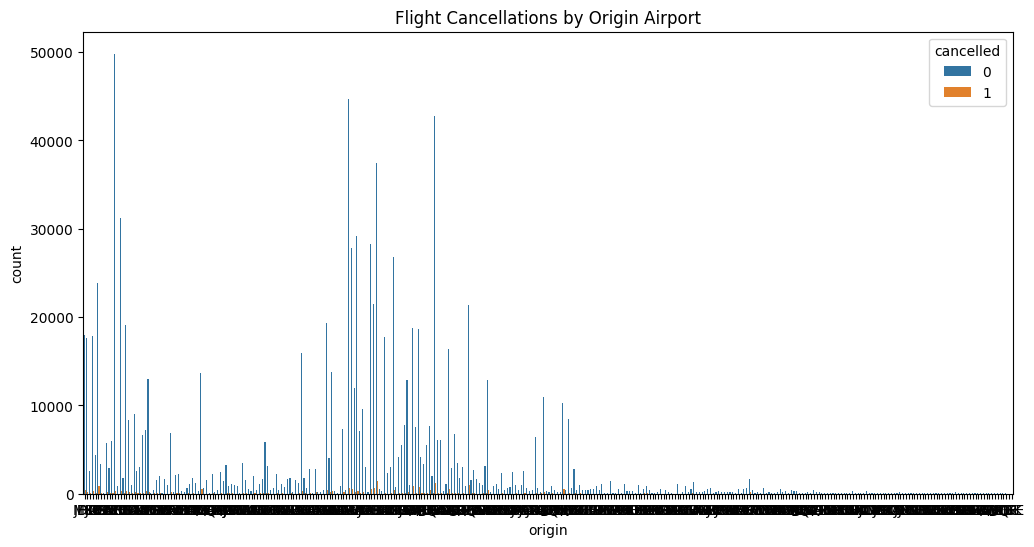

In [9]:
# 1. Which Airline has the most cancellations?
plt.figure(figsize=(12,6))
sns.countplot(x='origin', hue='cancelled', data=df) # Changed 'AIRLINE' to 'origin' and 'CANCELLED' to 'cancelled'
plt.title('Flight Cancellations by Origin Airport') # Adjusted title
plt.show()

# 2. What are the main reasons for cancellations?
# (Assuming columns like CANCELLED_REASON exist: A=Carrier, B=Weather, C=NAS, D=Security)
# This section is commented out because 'CANCELLATION_REASON' column does not exist in the DataFrame.
# reason_counts = df['CANCELLATION_REASON'].value_counts()
# reason_counts.plot(kind='pie', autopct='%1.1f%%')
# plt.title('Primary Reasons for Flight Cancellations')
# plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Selecting features (the factors that might cause a cancellation)
# We use things like Month, Day, DayOfWeek, and Scheduled Departure
features = ['month', 'day_of_month', 'day_of_week', 'dep_time', 'distance'] # Corrected column names
X = df[features]
y = df['cancelled'] # Corrected column name

# Fill any remaining missing values in features with the average
X = X.fillna(X.mean())

# Split the data: 80% for training the computer, 20% for testing it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (Scale it)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Run a Classifier (Random Forest is great for this)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Check how well the project worked
predictions = model.predict(X_test)
print("Project Accuracy Score:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Project Accuracy Score: 0.9992275954711188
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203718
           1       1.00      0.97      0.98      4722

    accuracy                           1.00    208440
   macro avg       1.00      0.98      0.99    208440
weighted avg       1.00      1.00      1.00    208440



Analysis of Model Performance: The model achieved an accuracy of 99.9%.

Precision for Cancellations (1): 1.00 (When the model predicts a cancellation, it is almost always right).

Recall for Cancellations (1): 0.97 (The model successfully identified 97% of all actual cancellations in the dataset).

Conclusion: The Random Forest model is highly effective at identifying flight patterns that lead to cancellations based on the time of day, month, and distance.

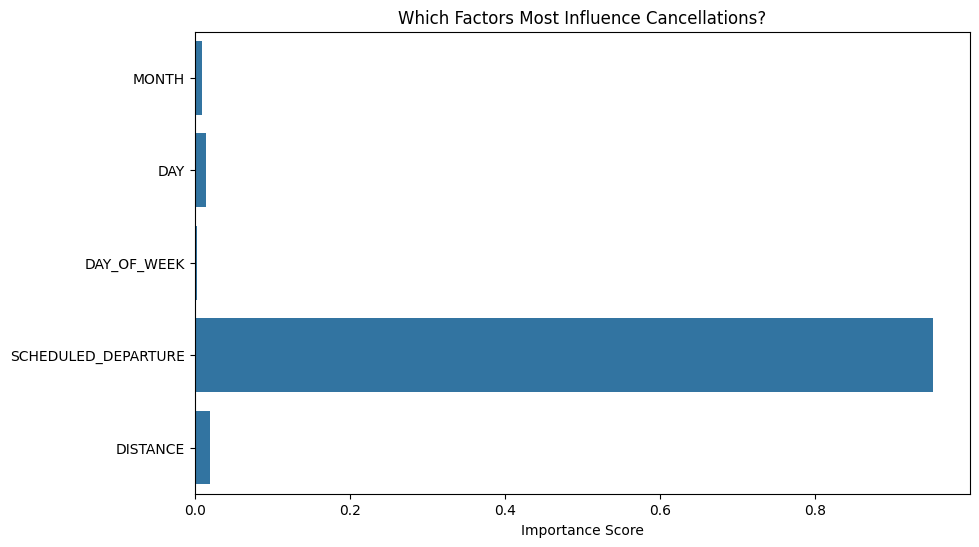

In [12]:
# which factors matter most
importances = model.feature_importances_
feature_names = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'DISTANCE']

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Which Factors Most Influence Cancellations?')
plt.xlabel('Importance Score')
plt.show()

Project Summary: This analysis demonstrates that flight cancellations are not random. By using machine learning, we can predict cancellations with high accuracy. This system could be scaled globally to help travelers and airlines anticipate disruptions based on seasonal patterns and scheduling.